In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [69]:
poverty_rate_df = pd.read_csv("Resources/combined_poverty_rate_revised.csv")

poverty_rate_df = poverty_rate_df.rename(columns={'2019 Poverty Rate':'2019',
                                                 '2018 Poverty Rate':'2018',
                                                 '2017 Poverty Rate':'2017',
                                                 '2016 Poverty Rate':'2016',
                                                 '2015 Poverty Rate':'2015'})
poverty_rate_df.describe()

,2019,2018,2017,2016,2015
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,12.680784,14.539179,14.785522,15.981940,16.444552
std,5.701406,6.856403,6.622364,7.047239,7.321555
min,1.840000,1.340000,1.830000,2.110000,2.430000
25%,8.682500,9.707500,10.395000,11.002500,11.652500
50%,12.460000,13.780000,13.980000,15.235000,15.265000
75%,15.557500,17.850000,18.107500,19.517500,20.767500
max,37.310000,49.040000,42.270000,43.350000,49.080000


In [42]:
high_pov_rate = poverty_rate_df[poverty_rate_df['2019'] >= 25]
high_pov_rate

,Corporation Name,2019,2018,2017,2016,2015
22,Cannelton City Schools,27.82,32.96,28.15,28.41,24.63
79,Gary Community School Corporation,37.31,49.04,41.56,43.35,49.08
93,Indianapolis Public Schools,26.54,32.90,34.04,41.00,42.06
103,Lake Ridge New Tech Schools,26.28,39.29,36.75,39.76,42.56
119,Marion Community Schools,27.87,32.40,34.57,33.58,33.16
122,Michigan City Area Schools,32.49,31.32,27.15,30.49,30.84
133,Muncie Community Schools,31.09,32.44,27.40,31.65,34.04
181,River Forest Community School Corporation,25.80,34.34,29.76,33.85,37.41
186,School City of East Chicago,34.46,46.89,42.27,43.22,45.90
203,South Adams Schools,29.15,30.53,32.17,33.74,33.03


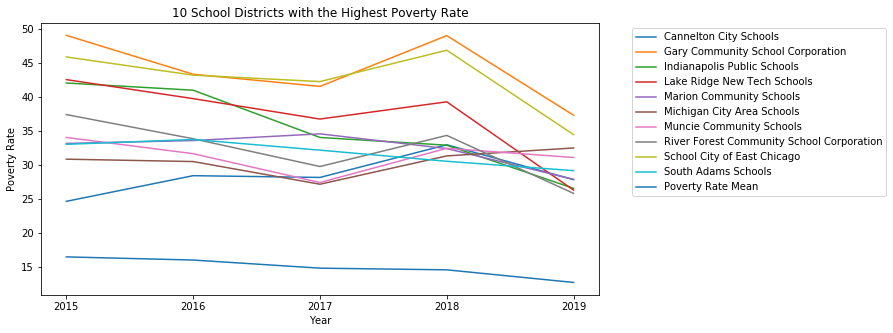

In [83]:
years = ['2015', '2016', '2017', '2018', '2019']
plt.figure(figsize=(10,5))

school_1 = plt.plot(years, high_pov_rate.loc[22,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[22,"Corporation Name"])

school_2 = plt.plot(years, high_pov_rate.loc[79,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[79,"Corporation Name"])

school_3 = plt.plot(years, high_pov_rate.loc[93,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[93,"Corporation Name"])

school_4 = plt.plot(years, high_pov_rate.loc[103,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[103,"Corporation Name"])

school_5 = plt.plot(years, high_pov_rate.loc[119,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[119,"Corporation Name"])

school_6 = plt.plot(years, high_pov_rate.loc[122,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[122,"Corporation Name"])

school_7 = plt.plot(years, high_pov_rate.loc[133,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[133,"Corporation Name"])

school_8 = plt.plot(years, high_pov_rate.loc[181,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[181,"Corporation Name"])

school_9 = plt.plot(years, high_pov_rate.loc[186,["2015","2016","2017","2018","2019"]], 
                        label=high_pov_rate.loc[186,"Corporation Name"])

school_10 = plt.plot(years, high_pov_rate.loc[203,["2015","2016","2017","2018","2019"]],
                     label=high_pov_rate.loc[203,"Corporation Name"])

mean = plt.plot(years, poverty_rate_df[["2015","2016","2017","2018","2019"]].mean(), label="Poverty Rate Mean")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("10 School Districts with the Highest Poverty Rate")
plt.xlabel("Year")
plt.ylabel("Poverty Rate")
plt.show()

In [39]:
low_pov_rate = poverty_rate_df[poverty_rate_df['2019'] <= 4]
low_pov_rate

,Corporation Name,2019,2018,2017,2016,2015
19,Brownsburg Community School Corporation,3.68,4.95,4.25,5.17,4.79
23,Carmel Clay Schools,2.82,2.88,2.45,2.72,3.56
26,Center Grove Community School Corporation,3.40,4.94,5.12,4.83,4.99
55,East Porter County School Corporation,3.56,6.42,6.34,5.94,7.23
90,Hamilton Southeastern Schools,3.61,3.41,3.16,3.87,3.98
153,North West Hendricks Schools,3.47,4.08,3.38,3.97,4.30
159,Northwest Allen County Schools,3.27,4.78,4.44,6.69,6.47
220,Southern Hancock County Community School Corpo...,3.59,4.32,4.44,4.49,4.87
239,Union Township School Corporation,3.56,6.48,5.89,5.46,7.97
267,Zionsville Community Schools,1.84,1.34,1.83,2.11,2.43


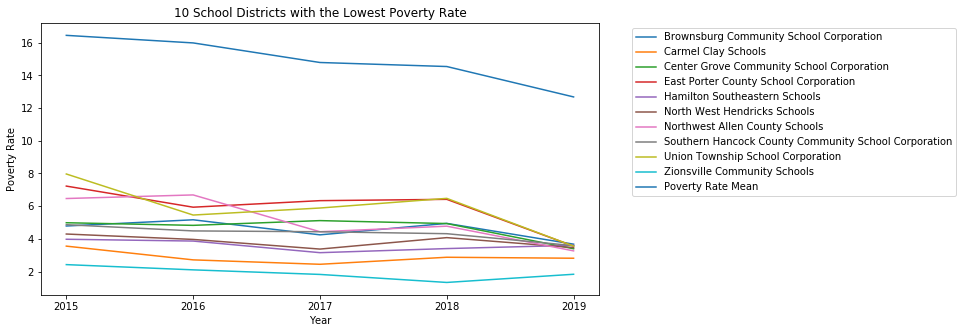

In [82]:
plt.figure(figsize=(10,5))

low_school_1 = plt.plot(years, low_pov_rate.loc[19,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[19,"Corporation Name"])

low_school_2 = plt.plot(years, low_pov_rate.loc[23,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[23,"Corporation Name"])

low_school_3 = plt.plot(years, low_pov_rate.loc[26,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[26,"Corporation Name"])

low_school_4 = plt.plot(years, low_pov_rate.loc[55,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[55,"Corporation Name"])

low_school_5 = plt.plot(years, low_pov_rate.loc[90,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[90,"Corporation Name"])

low_school_6 = plt.plot(years, low_pov_rate.loc[153,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[153,"Corporation Name"])

low_school_7 = plt.plot(years, low_pov_rate.loc[159,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[159,"Corporation Name"])

low_school_8 = plt.plot(years, low_pov_rate.loc[220,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[220,"Corporation Name"])

low_school_9 = plt.plot(years, low_pov_rate.loc[239,["2015","2016","2017","2018","2019"]], 
                        label=low_pov_rate.loc[239,"Corporation Name"])

low_school_10 = plt.plot(years, low_pov_rate.loc[267,["2015","2016","2017","2018","2019"]],
                     label=low_pov_rate.loc[267,"Corporation Name"])

mean = plt.plot(years, poverty_rate_df[["2015","2016","2017","2018","2019"]].mean(), label="Poverty Rate Mean")
plt.title("10 School Districts with the Lowest Poverty Rate")
plt.xlabel("Year")
plt.ylabel("Poverty Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()